## Regression Tree

트리를 기반으로 하는 회귀방식
- 리프 노드에 속한 데이터 값 (타깃 값)의 평균값을 구해 회귀 예측값을 계산함 == 이게 리프노드에 결정 값으로 할당되는 것!
- decision tree, random forest, GBM, XGBoost, LightGBM 등 모든 트리 기반 알고리즘은 분류뿐만 아니라 회귀도 가능하다. 
    - 트리 생성이 CART 알고리즘에 기반하고 있기 때문! (: 분류 + 회귀 도 가능하게 해주는 트리 생성 알고리즘)

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = df.drop('PRICE', axis=1)
y = df.PRICE

#### RandomForest Regressor를 이용한 회귀

In [6]:
rf_regressor = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf_regressor, X, y, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.423


#### Decision Tree Regressor, GradientBoost Regressor, XGB Regressor, LightGBM Regressor

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [9]:
dt_regressor = DecisionTreeRegressor(random_state=0, max_depth=4)
gb_regressor = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_regressor = XGBRegressor(n_estimators=1000)
lgb_regressor = LGBMRegressor(n_estimators=1000)

# tree based regressor models - evaluation
models = [rf_regressor, dt_regressor, gb_regressor, xgb_regressor, lgb_regressor]
for model in models:
    neg_mse_scores = cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5 fold cross validation average RMSE: {0:.3f}'.format(avg_rmse))

#### RandomForestRegressor ####
5 fold cross validation average RMSE: 4.423
#### DecisionTreeRegressor ####
5 fold cross validation average RMSE: 5.978
#### GradientBoostingRegressor ####
5 fold cross validation average RMSE: 4.269
#### XGBRegressor ####
5 fold cross validation average RMSE: 4.251
#### LGBMRegressor ####
5 fold cross validation average RMSE: 4.646


회귀 트리 Regressor class는 선형 회귀와 다른 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없음. 

대신 'feature_importances_'를 이용해 피처별 중요도를 알 수 있음.

<AxesSubplot:>

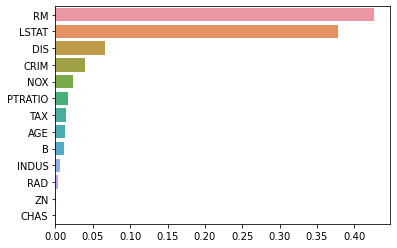

In [11]:
# 모델의 피처별 중요도 시각화
import seaborn as sns
%matplotlib inline

rf_regressor.fit(X,y)
feature_series = pd.Series(data = rf_regressor.feature_importances_,
                           index = X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

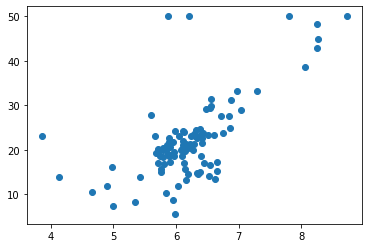

In [14]:
# 회귀 트리 regressor가 예측하는 것 vs 선형회귀 비교 시각화

df_sample = df[['RM', 'PRICE']].sample(n=100, random_state=0)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=df_sample.RM, y=df_sample.PRICE)

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
dt_reg_2 = DecisionTreeRegressor(max_depth=2)
dt_reg_7 = DecisionTreeRegressor(max_depth=7)

# 예측할 데이터 (x값들)
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_train = df_sample.RM.values.reshape(-1,1)
y_train = df_sample.PRICE.values.reshape(-1,1)

lr.fit(X_train, y_train)
dt_reg_2.fit(X_train, y_train)
dt_reg_7.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
pred_dt2 = dt_reg_2.predict(X_test)
pred_dt7 = dt_reg_7.predict(X_test)

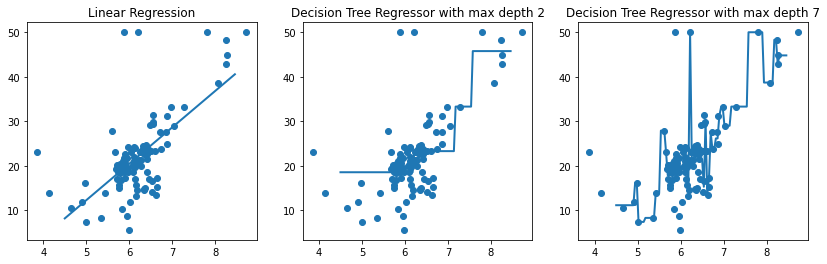

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(df_sample.RM, df_sample.PRICE)
ax1.plot(X_test, pred_lr, label = "linear", linewidth=2)

ax2.set_title('Decision Tree Regressor with max depth 2')
ax2.scatter(df_sample.RM, df_sample.PRICE)
ax2.plot(X_test, pred_dt2, label = "max_depth:2", linewidth=2)

ax3.set_title('Decision Tree Regressor with max depth 7')
ax3.scatter(df_sample.RM, df_sample.PRICE)
ax3.plot(X_test, pred_dt7, label = "max_depth:7", linewidth=2)

- 선형 회귀는 직선으로 예측 회귀선을 표현하는 데 반해, 
- 회귀 트리는 분할되는 데이터 지점에 따라 계단 형태의 회귀선을 만듦